In [1]:
import numpy as np
import pygimli as pg
import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle
from datetime import datetime
from glob import glob

In [6]:
dir="C:/Users/Expedition/Desktop/expedition2025_winter/"
ddir="C:/Users/Expedition/Desktop/expedition2024/"

In [8]:
data_2024 = ert.load(ddir + '15Aug/k38_diag1_ws.tx0')
data_2025 = ert.load(dir + '15Mar/k38_diag1_ws_march.tx0')
data_topo = pd.read_csv(dir + '15Mar/k38_diag1_topo.txt', sep='\s+', header=None)

kamik = [data_2024, data_2025]

15/03/25 - 03:01:06 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
15/03/25 - 03:01:06 - pyGIMLi - INFO - could not read res2dinv ... try Ascii columns
15/03/25 - 03:01:06 - pyGIMLi - INFO - Failed importing Ascii column file. Consider using pybert.
15/03/25 - 03:01:06 - pyGIMLi - INFO - No electrode positions found!
15/03/25 - 03:01:06 - pyGIMLi - INFO - imported:  Data: Electrodes: 48 data: 405
15/03/25 - 03:01:06 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
15/03/25 - 03:01:06 - pyGIMLi - INFO - could not read res2dinv ... try Ascii columns
15/03/25 - 03:01:06 - pyGIMLi - INFO - Failed importing Ascii column file. Consider using pybert.
15/03/25 - 03:01:06 - pyGIMLi - INFO - No electrode positions found!
15/03/25 - 03:01:06 - pyGIMLi - INFO - imported:  Data: Electrodes: 48 data: 405


In [9]:
for data in kamik:
    for i in range(data.sensorCount()):
        x_new = data_topo[0][i]  # Get x-value from diag1_topo[0]
        y_new = data_topo[1][i]  # Get y-value from diag1_topo[1]
        data.setSensorPosition(i, [x_new, y_new])  # Update electrode position


In [10]:
for data in kamik:
    data['err'] = data['iperr']
    data["k"] = ert.createGeometricFactors(data, numerical=True)

15/03/25 - 03:07:23 - pyGIMLi - INFO - Create default mesh for geometric factor calculation.
15/03/25 - 03:07:27 - pyGIMLi - INFO - Save RVector binary
15/03/25 - 03:07:27 - pyGIMLi - INFO - Cache stored: C:\Users\Expedition\AppData\Roaming\pygimli\Cache\3920399491128677022
15/03/25 - 03:07:27 - pyGIMLi - INFO - Cache c:\Users\Expedition\miniconda3\envs\pgdev\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (5.2s x 2): C:\Users\Expedition\AppData\Roaming\pygimli\Cache\4307862226889712728


In [39]:
tl = ert.TimelapseERT(kamik, paraMaxCellSize=1)

15/03/25 - 04:21:50 - pyGIMLi - INFO - Cache c:\Users\Expedition\miniconda3\envs\pgdev\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 1): C:\Users\Expedition\AppData\Roaming\pygimli\Cache\6566472687923708870


In [64]:
tl.fullInversion(paraMaxCellSize=1, lam=20, verbose=True)

15/03/25 - 04:54:12 - pyGIMLi - INFO - Found 2 regions.
15/03/25 - 04:54:12 - pyGIMLi - INFO - Region with smallest marker (1) set to background
15/03/25 - 04:54:12 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/03/25 - 04:54:12 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/03/25 - 04:54:13 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2043 Cells: 3816 Boundaries: 2996
15/03/25 - 04:54:13 - pyGIMLi - INFO - Starting inversion.


698 model cells
Mesh: Nodes: 2043 Cells: 3816 Boundaries: 2996
fop: <pygimli.frameworks.timelapse.MultiFrameModelling object at 0x000001A10A422F70>
Data transformation: Identity transform
Model transformation: Logarithmic transform
min/max (data): 13.99/1641
min/max (error): 3%/3%
min/max (start model): 306/306
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 10459.95
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 1097.66 (dPhi = 89.19%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  125.95 (dPhi = 84.91%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   33.82 (dPhi = 48.41%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   30.91 (dPhi = 5.42%) lam: 20.0
----------------------------

1396 [43.69918297594153,...,1928.506858392202]

array([<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
       <Axes: xlabel='$x$ in m', ylabel='Depth in m'>], dtype=object)

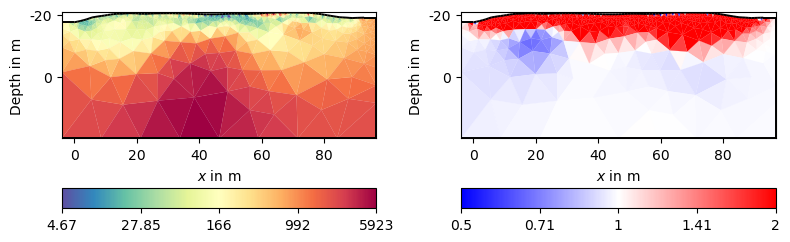

In [71]:
tl.showAllModels(ratio=True, rMax=2)


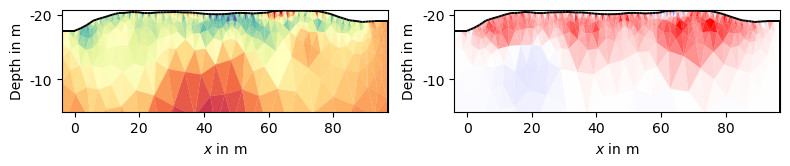

In [68]:
ax = tl.showAllModels(colorBar=False, ratio=True)
ax[0].set_ylim(5)
ax[1].set_ylim(5)
ax[0].set_aspect(2)
ax[1].set_aspect(2)


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1eac9150850>)

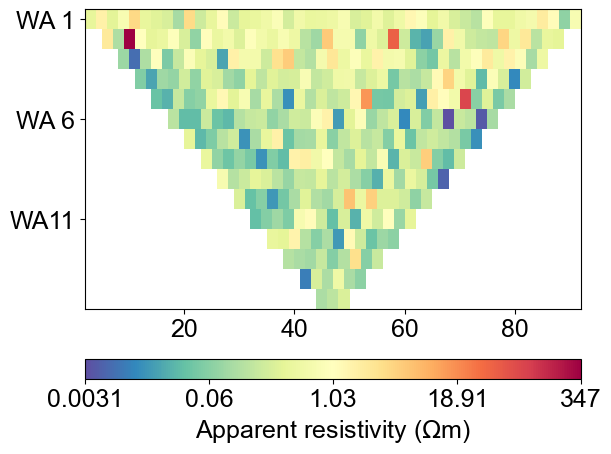

In [53]:
ert.showData(data,data['iperr'])

In [54]:
data['err'] = data['iperr']

In [26]:
data.remove(data['rhoa']<=0.1)

In [55]:
data["k"] = ert.createGeometricFactors(data, numerical=True)

15/03/25 - 02:43:24 - pyGIMLi - INFO - Cache c:\Users\Expedition\miniconda3\envs\pgdev\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (5.2s x 1): C:\Users\Expedition\AppData\Roaming\pygimli\Cache\4307862226889712728


In [28]:
data.markInvalid(data['err']>4)

15/03/25 - 02:43:35 - pyGIMLi - INFO - Found 2 regions.
15/03/25 - 02:43:35 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/03/25 - 02:43:35 - pyGIMLi - INFO - Found 2 regions.
15/03/25 - 02:43:35 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/03/25 - 02:43:35 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/03/25 - 02:43:35 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/03/25 - 02:43:36 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3524 Cells: 6692 Boundaries: 5196
15/03/25 - 02:43:36 - pyGIMLi - INFO - Use median(data values)=567.664
15/03/25 - 02:43:36 - pyGIMLi - INFO - Created startmodel from forward operator:1290, min/max=567.664000/567.664000
15/03/25 - 02:43:36 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001EAC8F44E50>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 164/1643
min/max (error): 0.3%/3.5e+04%
min/max (start model): 568/568
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  230.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    5.58 (dPhi = 96.91%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    4.44 (dPhi = 18.45%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    3.12 (dPhi = 24.91%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    1.00 (dPhi = 44.02%) lam: 10.0
------------------------------------------------

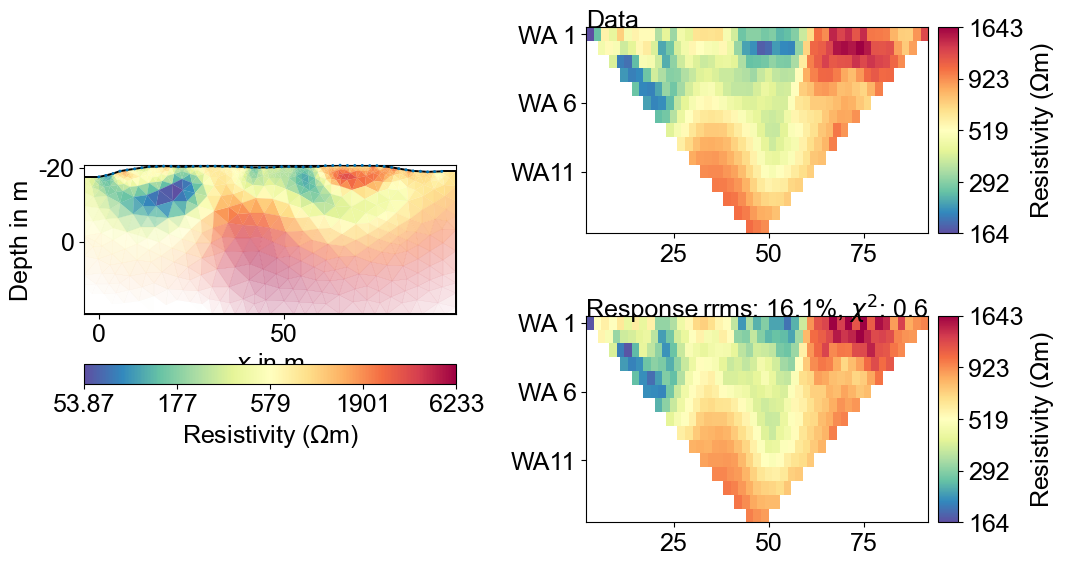

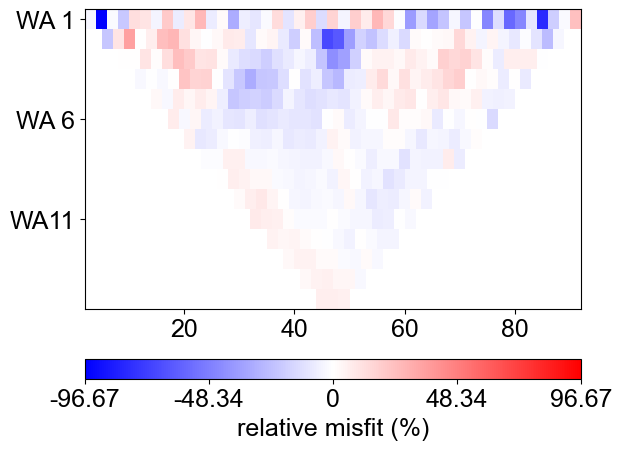

In [56]:
mgr = ert.ERTManager(data)
mgr.invert(data, verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=10, paraMaxCellSize=10)
mgr.showResultAndFit()
mgr.showMisfit()

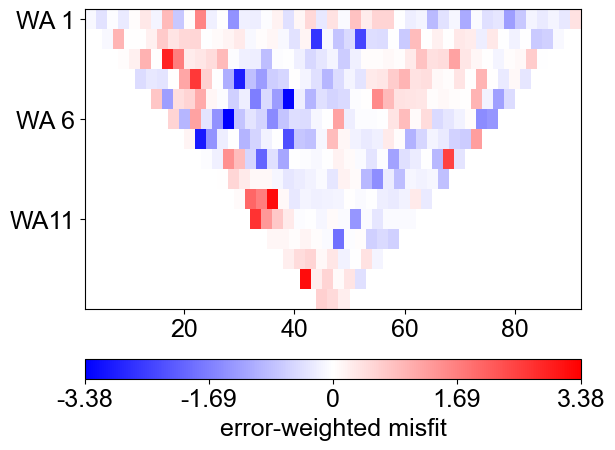

In [57]:
mgr.showMisfit(errorWeighted=True)

(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x1eaca175f90>)

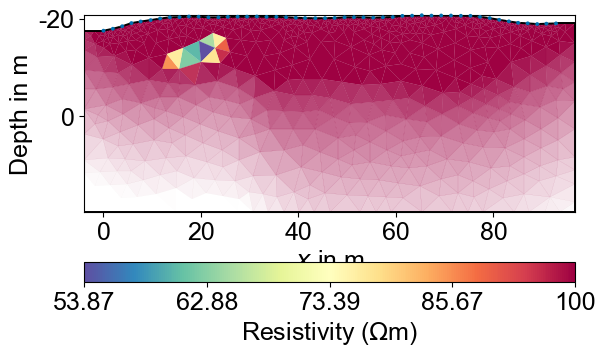

In [58]:
mgr.showResult(cMax=100)

15/03/25 - 02:44:27 - pyGIMLi - INFO - Saving inversion results to: C:/Users/Expedition/Desktop/expedition2025_winter/all_inversions/kamik_diag1_winter\ERTManager


Path C:/Users/Expedition/Desktop/expedition2025_winter/all_inversions/kamik_diag1_winter\ERTManager already exists. Skipping


('C:/Users/Expedition/Desktop/expedition2025_winter/all_inversions/kamik_diag1_winter\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

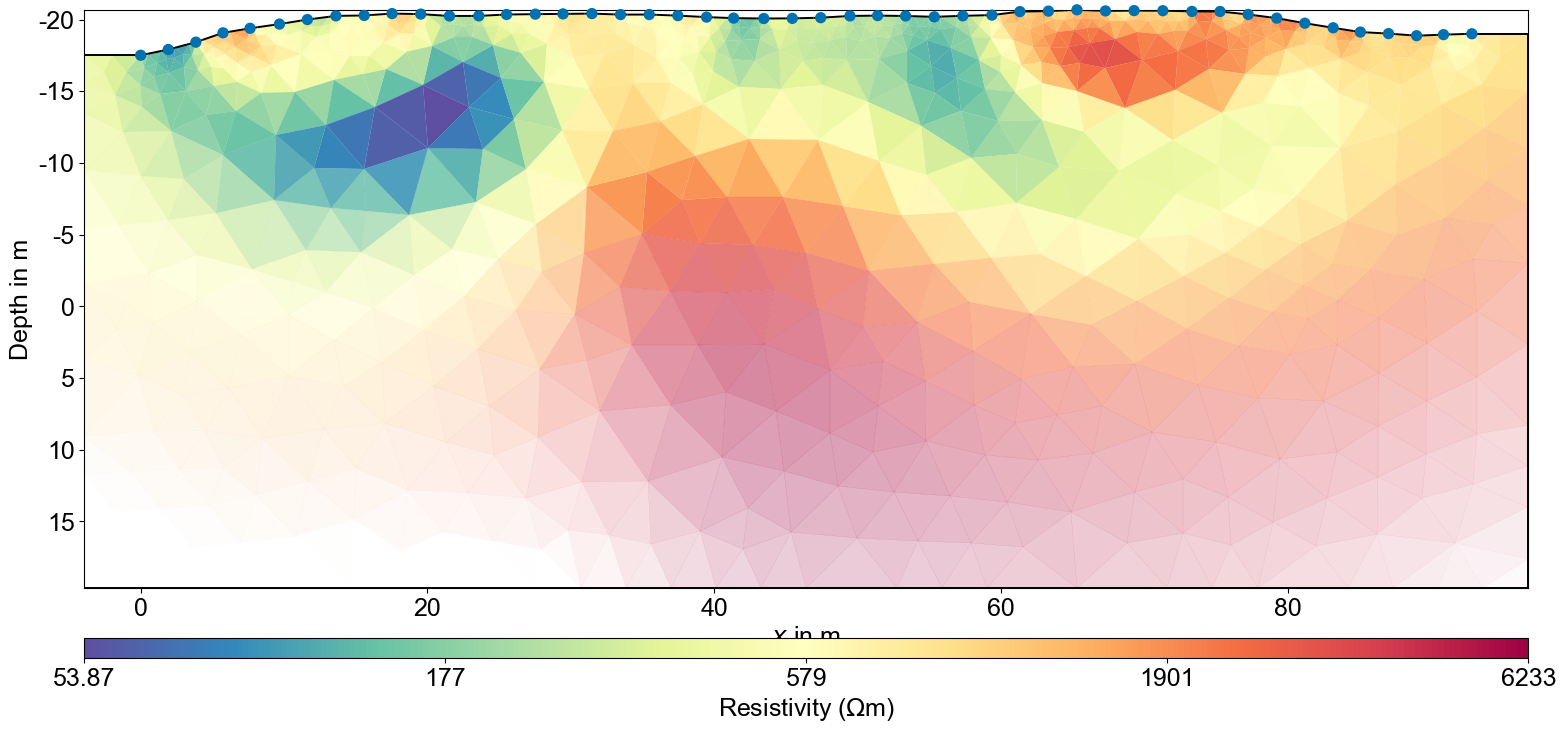

In [59]:
mgr.saveResult(dir+ 'all_inversions/kamik_diag1_winter')

In [60]:
mesh_kamik2024winter = pg.load(dir+'all_inversions/kamik_diag1_winter/ERTManager/resistivity-pd.bms')
res_kamik2024winter = pg.load(dir+'all_inversions/kamik_diag1_winter/ERTManager/resistivity.vector')
cov_kamik2024winter = pg.load(dir+'all_inversions/kamik_diag1_winter/ERTManager/resistivity-cov.vector')

mesh_kamik2024summer = pg.load(ddir+'all_inversions/kamik_diag1_summer/ERTManager/resistivity-pd.bms')
res_kamik2024summer = pg.load(ddir+'all_inversions/kamik_diag1_summer/ERTManager/resistivity.vector')
cov_kamik2024summer = pg.load(ddir+'all_inversions/kamik_diag1_summer/ERTManager/resistivity-cov.vector')

C:\Users\Expedition\AppData\Local\Temp\ipykernel_52648\2444055434.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
C:\Users\Expedition\AppData\Local\Temp\ipykernel_52648\2444055434.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])


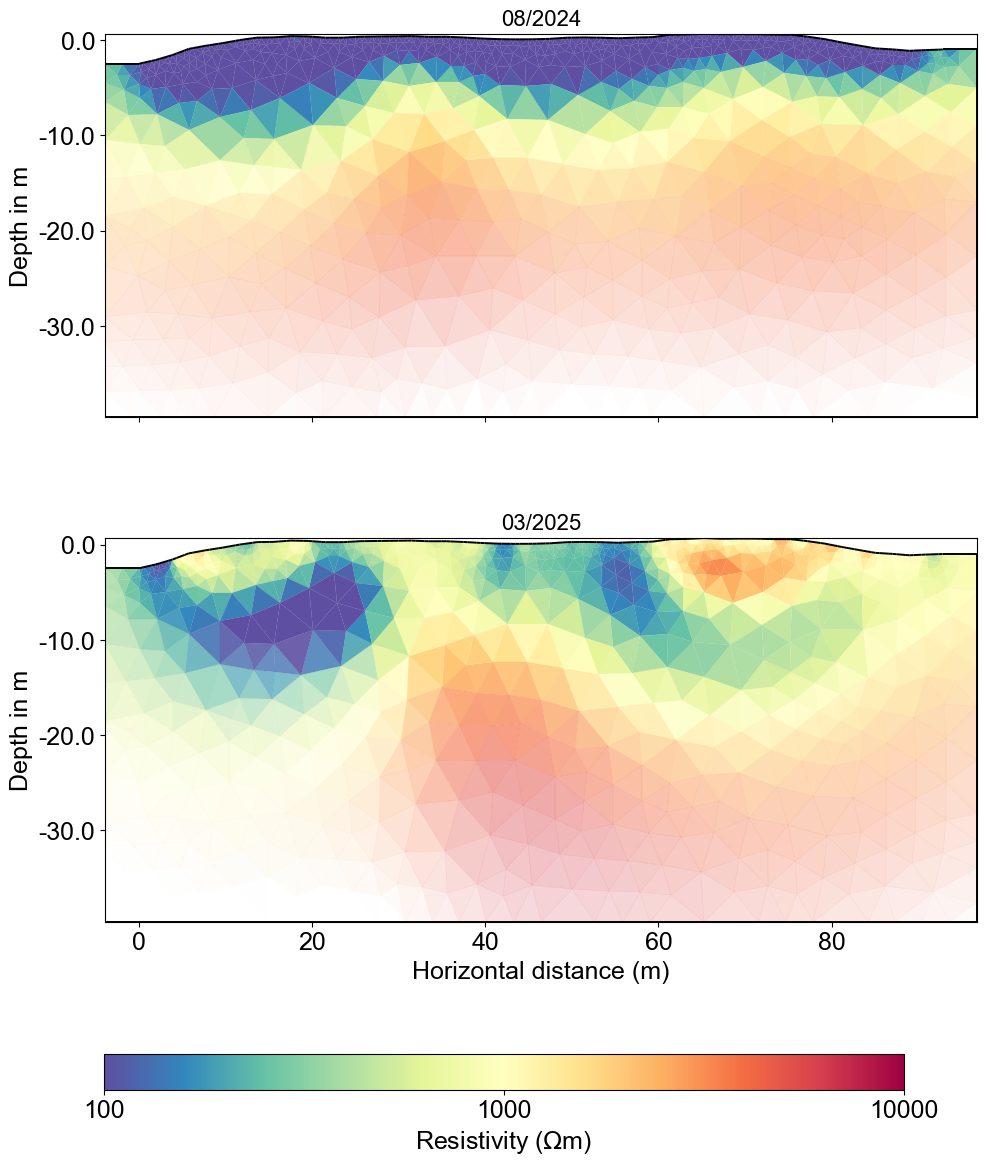

In [62]:
from matplotlib.ticker import LogLocator, LogFormatter

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 18
plt.style.use('seaborn-v0_8-colorblind')
cMin=100
cMax=10000
fig, ax = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

pg.show(mesh_kamik2024summer, res_kamik2024summer, logScale=True, cMap= 'Spectral_r',ax=ax[0], cMin=cMin, cMax=cMax, colorBar=False, coverage=cov_kamik2024summer)
pg.show(mesh_kamik2024winter, res_kamik2024winter, logScale=True, cMap= 'Spectral_r',ax=ax[1], colorBar=False, cMin=cMin, cMax=cMax, coverage=cov_kamik2024winter, sharex=True)

#plt.subplots_adjust(left=0.1, right=0.9, bottom=0.15, top=0.9, wspace=0.5) 


cax = fig.add_axes([0.1, -0.01, 0.8, 0.03])  

colorbar = pg.viewer.mpl.createColorBarOnly(ax=cax, cMin=cMin, cMax=cMax, logScale=True,cMap= 'Spectral_r')

cax.xaxis.set_major_locator(LogLocator(base=10.0))
cax.xaxis.set_major_formatter(LogFormatter(labelOnlyBase=False))
cax.set_xlabel('Resistivity ($\Omega$m)')

ax[0].set_title('08/2024', fontsize=16)
ax[1].set_title('03/2025', fontsize=16)


ax[0].set_aspect(1.1)
ax[1].set_aspect(1.1)


current_ticks = ax[0].get_yticks()
relative_ticks = current_ticks-20

ax[0].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
ax[1].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
ax[0].set_xlabel("")
ax[1].set_xlabel("Horizontal distance (m)")

plt.show()

